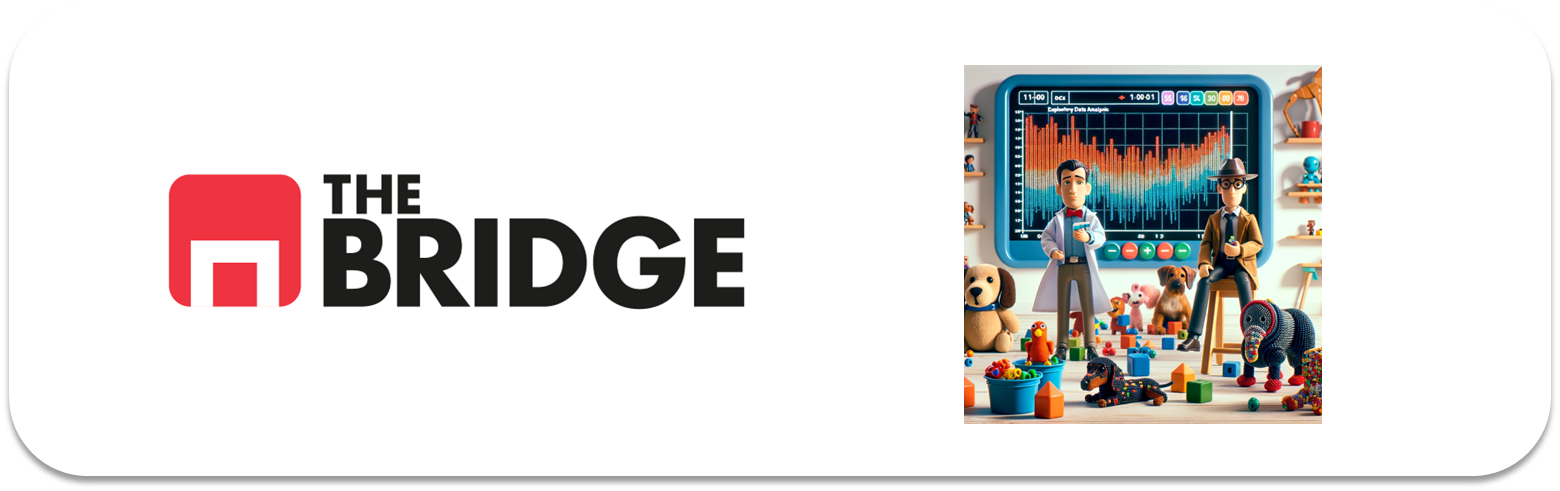

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [27]:
import pandas as pd
import seaborn as sns
from bootcampviztools import *

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [28]:
df_titanic = pd.read_csv('data/titanic.csv')
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [29]:
df_titanic.drop(["deck", "survived", "pclass", "embarked"], axis=1, inplace=True)
df_titanic

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [30]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
df_titanic

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [31]:
df_titanic.fillna({"embark_town": df_titanic.embark_town.mode()[0]}, inplace=True)

In [32]:
df_titanic.embark_town.value_counts(dropna=False)

embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [33]:
means = df_titanic.groupby('who').age.mean()

df_titanic.age = df_titanic.apply(lambda x: means[x.who] if pd.isnull(x.age) else x.age, axis=1)

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [34]:
# 1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños?

tabla_contingencia = pd.crosstab(df_titanic.who, df_titanic.alive)
tabla_contingencia

alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


In [35]:
# ¿Y en términos relativos?

tabla_contingencia_rel = pd.crosstab(df_titanic.who, df_titanic.alive, normalize="index")
tabla_contingencia_rel

alive,no,yes
who,,
child,0.409639,0.590361
man,0.836127,0.163873
woman,0.243542,0.756458


In [36]:
# ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic? ¿Y entre ser adulto o ser niño?

from scipy.stats import chi2_contingency, mannwhitneyu

tabla_contingencia_sexo = pd.crosstab(df_titanic.sex, df_titanic.alive)

print("Significancia sexo:")
print()
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_sexo)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value", p)
print("Grados de Libertad", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
print("¿Existe una relación estadísticamente significativa?", p<0.05)
print()

df_titanic["is_child"] = np.where(df_titanic.age < 16, 1, 0)

tabla_contingencia_nino = pd.crosstab(df_titanic.is_child, df_titanic.alive)

print("Significancia adulto vs niño:")
print()
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_nino)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value", p)
print("Grados de Libertad", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
print("¿Existe una relación estadísticamente significativa?", p<0.05)

Significancia sexo:

Valor Chi-Cuadrado: 260.71702016732104
P-Value 1.1973570627755645e-58
Grados de Libertad 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]
¿Existe una relación estadísticamente significativa? True

Significancia adulto vs niño:

Valor Chi-Cuadrado: 15.556993340077092
P-Value 8.005497211300105e-05
Grados de Libertad 1
Tabla de Frecuencias Esperadas:
 [[497.85858586 310.14141414]
 [ 51.14141414  31.85858586]]
¿Existe una relación estadísticamente significativa? True


In [37]:
# 2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?

tabla_contingencia_clase = pd.crosstab(df_titanic["class"], df_titanic.alive)
tabla_contingencia_clase

alive,no,yes
class,,
First,80,136
Second,97,87
Third,372,119


In [38]:
# ¿Y en términos relativos?

tabla_contingencia_clase_rel = pd.crosstab(df_titanic["class"], df_titanic.alive, normalize="index")
tabla_contingencia_clase_rel

alive,no,yes
class,,
First,0.370370,0.629630
Second,0.527174,0.472826
Third,0.757637,0.242363


In [39]:
# ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

chi2, p, dof, expected = chi2_contingency(tabla_contingencia_clase)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value", p)
print("Grados de Libertad", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
print("¿Existe una relación estadísticamente significativa?", p<0.05)
print()

Valor Chi-Cuadrado: 102.88898875696056
P-Value 4.549251711298793e-23
Grados de Libertad 2
Tabla de Frecuencias Esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]
¿Existe una relación estadísticamente significativa? True



In [40]:
# 3. ¿De qué ciudad sobrevivieron más personas?

tabla_contingencia_town = pd.crosstab(df_titanic["embark_town"], df_titanic.alive)
tabla_contingencia_town

alive,no,yes
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,219


In [41]:
# ¿Y porcentualmente de que ciudad sobrevivieron más personas?

tabla_contingencia_town_rel = pd.crosstab(df_titanic["embark_town"], df_titanic.alive, normalize="index")
tabla_contingencia_town_rel

alive,no,yes
embark_town,,
Cherbourg,0.446429,0.553571
Queenstown,0.610390,0.389610
Southampton,0.660991,0.339009


In [42]:
# ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

chi2, p, dof, expected = chi2_contingency(tabla_contingencia_town)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value", p)
print("Grados de Libertad", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)
print("¿Existe una relación estadísticamente significativa?", p<0.05)
print()

Valor Chi-Cuadrado: 25.964452881874784
P-Value 2.3008626481449577e-06
Grados de Libertad 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]
¿Existe una relación estadísticamente significativa? True



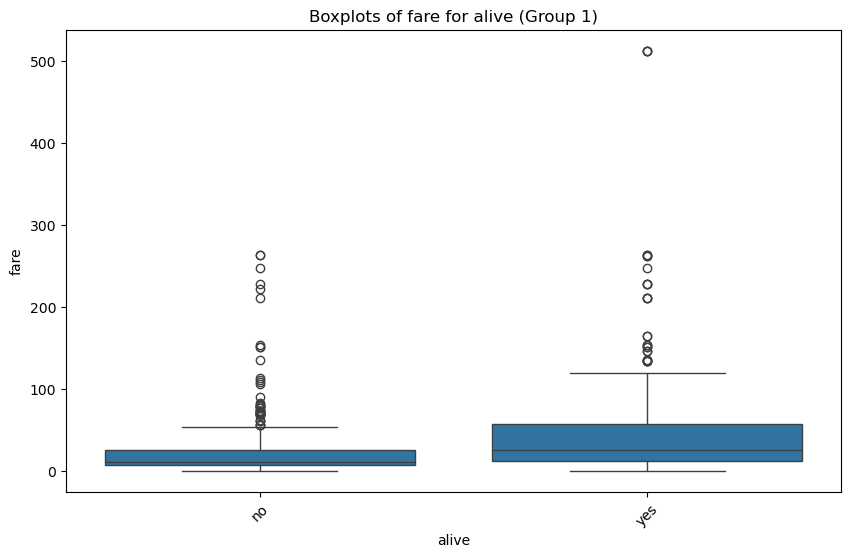

In [43]:
# 4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

plot_grouped_boxplots(df_titanic, "alive", "fare")

       count       mean        std  min      25%   50%   75%       max
alive                                                                 
no     549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
yes    342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292


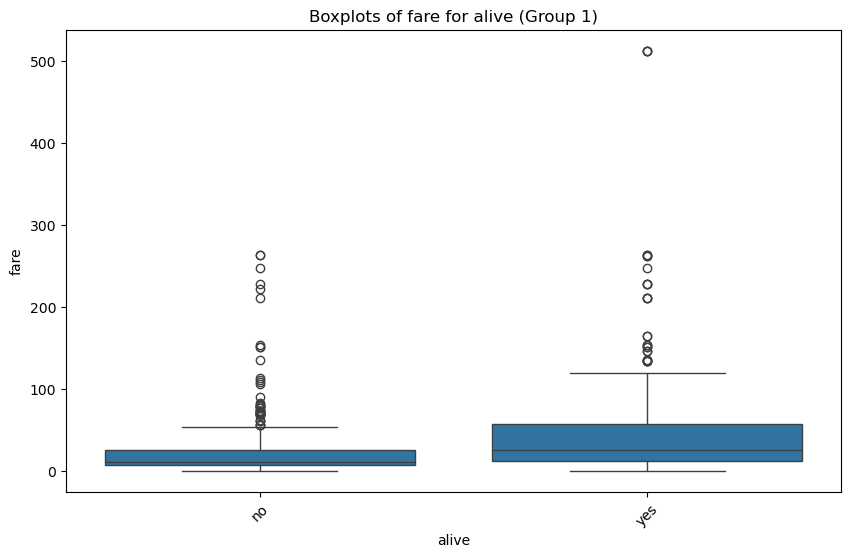

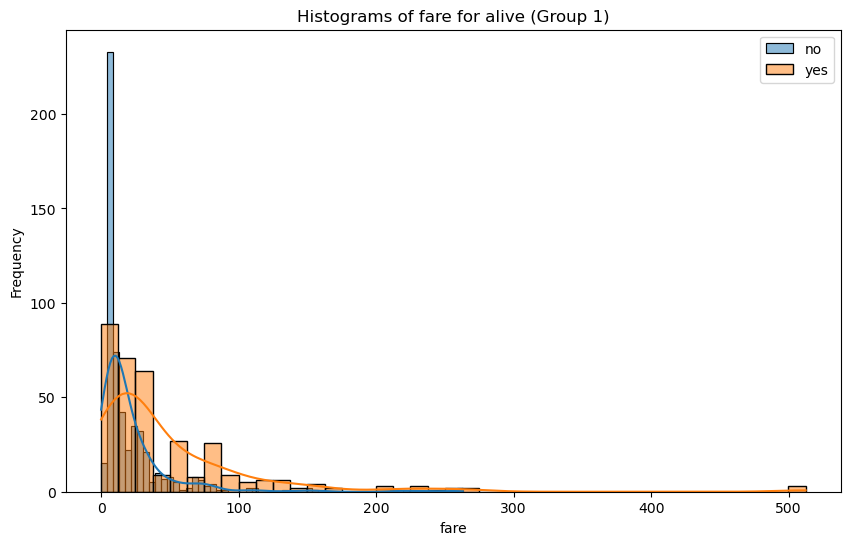

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


In [44]:
# 4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

print(df_titanic.groupby("alive").fare.describe())

plot_grouped_boxplots(df_titanic, "alive", "fare")

plot_grouped_histograms(df_titanic, "alive", "fare", 2)

group_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
group_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]

u_stat, p_valor = mannwhitneyu(group_a, group_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Claramente las personas que pagaron un precio menor tienen un porcentaje mucho mayor de muertes (se podría decir que lo barato les salió caro jeje)

Seguramente haya una tercera variable que se correlaciona con ambas, probablemente la clase (a más precio, clase más alta; a clase más alta, mayor ratio de supervivencia)

In [45]:
# 5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué?

df_titanic[df_titanic.fare == 0]

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members,is_child
179,male,36.000000,0,0,0.0,Third,man,True,Southampton,no,True,0,0
263,male,40.000000,0,0,0.0,First,man,True,Southampton,no,True,0,0
271,male,25.000000,0,0,0.0,Third,man,True,Southampton,yes,True,0,0
277,male,33.173123,0,0,0.0,Second,man,True,Southampton,no,True,0,0
302,male,19.000000,0,0,0.0,Third,man,True,Southampton,no,True,0,0
413,male,33.173123,0,0,0.0,Second,man,True,Southampton,no,True,0,0
466,male,33.173123,0,0,0.0,Second,man,True,Southampton,no,True,0,0
481,male,33.173123,0,0,0.0,Second,man,True,Southampton,no,True,0,0
597,male,49.000000,0,0,0.0,Third,man,True,Southampton,no,True,0,0
633,male,33.173123,0,0,0.0,First,man,True,Southampton,no,True,0,0


Todos eran varones adultos que viajaban solos y embarcaron en Southampton, origen del trayecto. Mi hipótesis es que se trataba de trabajadores a bordo de la embarcación. Lo único que no me termina de encajar es que viajen en distintas clases.

In [46]:
# ¿Qué ocurrió con la persona que más dinero se dejó?

df_titanic[df_titanic.fare == df_titanic.fare.max()]

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members,is_child
258,female,35.0,0,0,512.3292,First,woman,False,Cherbourg,yes,True,0,0
679,male,36.0,0,1,512.3292,First,man,True,Cherbourg,yes,False,1,0
737,male,35.0,0,0,512.3292,First,man,True,Cherbourg,yes,True,0,0


Tres personas son las que más dinero se dejaron. Sobrevivieron las tres. Poderoso caballero es don dinero.

In [47]:
# 6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

pd.crosstab(df_titanic.embark_town, df_titanic.alive, df_titanic.fare, aggfunc='median', margins=True)


alive,no,yes,All
embark_town,,,
Cherbourg,14.4583,56.92920,29.7000
Queenstown,7.7500,7.80835,7.7500
Southampton,10.5000,26.00000,13.0000
All,10.5000,26.00000,14.4542


Esta tabla, que contiene la mediana por cada par de valores cruzando alive y embark town, nos da cuenta de que los supervivientes de Cherbourg y Southampton pagaron más, pero no así los de Queenstown, que pagaron una cantidad muy cercana a los que no sobrevivieron. A la vez, nos da cuenta de que embarcar en Cherbourg era más caro (tanto para supervivientes como no) que en las otras ciudades, mientras que embarcar en Queenstown era más barato.

In [48]:
# 7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

# Voy a hacer varios cortes en la variable numérica continua 'edad':

def generacion(edad):
    if edad < 16:
        return 'child'
    elif edad < 60:
        return 'adult'
    else:
        return 'senior'
    
df_titanic['age_group'] = df_titanic.age.apply(generacion)

df_titanic[df_titanic.alive == 'yes'].groupby(["age_group", "class"]).alive.count()

age_group  class 
adult      First     126
           Second     67
           Third      93
child      First       5
           Second     19
           Third      25
senior     First       5
           Second      1
           Third       1
Name: alive, dtype: int64

En términos absolutos, sobrevivieron notablemente más adultos de primera clase que cualquier otro grupo combinado de grupo de edad y clase.

In [49]:
# En términos relativos:

df_titanic.groupby(["age_group", "class"]).alive.value_counts(sort=False, normalize=True)

age_group  class   alive
adult      First   no       0.347150
                   yes      0.652850
           Second  no       0.583851
                   yes      0.416149
           Third   no       0.782710
                   yes      0.217290
child      First   no       0.166667
                   yes      0.833333
           Second  yes      1.000000
           Third   no       0.568966
                   yes      0.431034
senior     First   no       0.705882
                   yes      0.294118
           Second  no       0.750000
                   yes      0.250000
           Third   no       0.800000
                   yes      0.200000
Name: proportion, dtype: float64

Los niños de segunda y primera clase tienen el ratio más alto de supervivencia. Nótese la importancia de ver ambas variables juntas en el hecho de que los adultos de primera clase sobrevivieron más en proporción que los niños de tercera clase.

In [50]:
# 8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

# También haré cortes en el coste del billete (ver práctica obligatoria de la Unidad 1 para la justificación de estos cortes concretos)

def grupos_billete(coste):
    if coste <= 35:
        return 'bajo'
    elif coste <= 135:
        return 'medio'
    else:
        return 'alto'
    
df_titanic['fare_group'] = df_titanic.fare.apply(grupos_billete)

df_titanic[df_titanic.alive == 'yes'].groupby(["age_group", "class"]).alive.count()

age_group  class 
adult      First     126
           Second     67
           Third      93
child      First       5
           Second     19
           Third      25
senior     First       5
           Second      1
           Third       1
Name: alive, dtype: int64

In [51]:
# En términos relativos: 

df_titanic.groupby(["age_group", "fare_group"]).alive.value_counts(sort=False, normalize=True)

age_group  fare_group  alive
adult      alto        no       0.266667
                       yes      0.733333
           bajo        no       0.710784
                       yes      0.289216
           medio       no       0.378571
                       yes      0.621429
child      alto        no       0.333333
                       yes      0.666667
           bajo        no       0.390625
                       yes      0.609375
           medio       no       0.500000
                       yes      0.500000
senior     alto        no       1.000000
           bajo        no       0.823529
                       yes      0.176471
           medio       no       0.500000
                       yes      0.500000
Name: proportion, dtype: float64

Parece que los niños tienen un ratio de supervivencia similar independientemente del coste del billete, mientras que para los adultos, parece que a más precio pagado, más ratio de supervivencia. Para los mayores, los números son insuficientes.

Veámoslo mejor de otra forma:

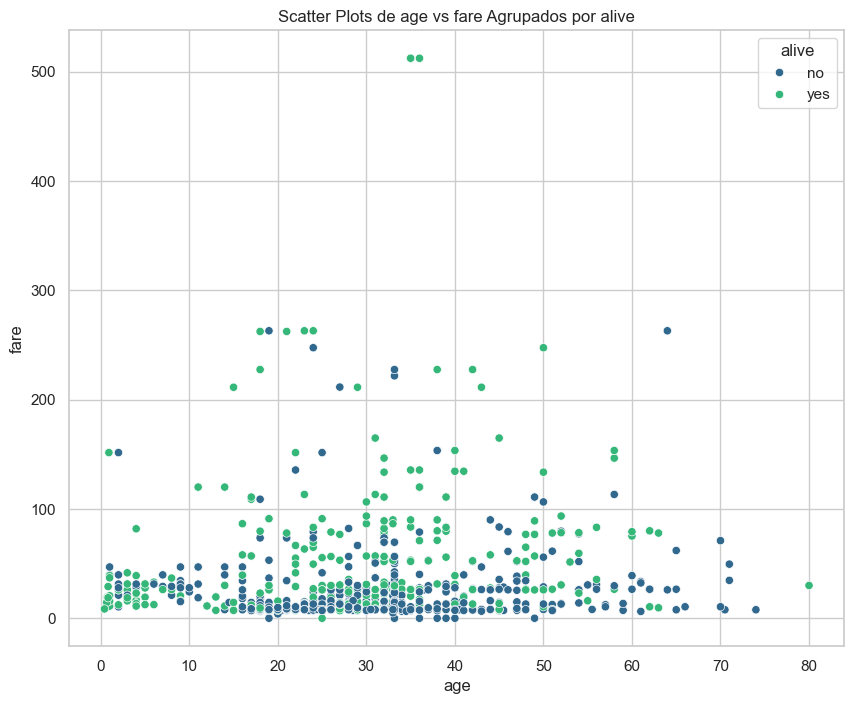

In [54]:
scatter_plots_agrupados(df_titanic, "alive", "age", "fare")

Vemos una concentración de supervivientes de baja edad y bajo precio, seguida de una concentración de muertos a partir de los 16 años de edad en el rango de los precios bajos. A medida que avanza la edad, los muertos se distribuyen no sólo entre los precios más bajos, sino en precios medios también.

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [56]:
df_viajes = pd.read_csv("data/dataset_viajes_jun23.csv")
df_viajes

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


In [59]:
df_viajes.aircompany.value_counts()

aircompany
TabarAir      142
MoldaviAir    133
PamPangea     117
FlyQ          108
Airnar        100
Name: count, dtype: int64

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

In [ ]:
# See extras

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.